In [1]:
# Clustering (군집화)에 필요한 라이브러리를 import 시킨다
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

Clustering이란 여러개의 데이터가 있을 때 군집화 하는 것을 의미한다.   
비슷한 데이터끼리 묶으면 관리하기 쉬운 장점이 있다. 예를들면 학원을 운영한다 했을 때 고급반, 중급반으로 나눠 적절히 분류 한다면 데이터를 확용하는 방안이 많을 것이다.    
비지도 학습(Unsupervised Learning) 알고리즘은 정확한 방향성이 일치하지 않더라도 알아서 학습이 가능한 알고리즘으로 데이터를 군집화 하는 알고리즘들이 비지도 학습에 속한다. => KMeans 알고리즘이 대표적인 비지도 학습 알고리즘이다.
(지도 학습 처럼 문제는 있는데 답이 없다).

In [2]:
df = pd.read_csv('./Data/cluster.csv')
df

,x,y
0,2,3
1,2,11
2,2,18
3,4,5
4,4,7
5,5,3
6,5,15
7,6,6
8,6,8
9,6,9


In [3]:
print(df.index)
print(df.columns)
print(list(df.index))
# values: 데이터프레임에 저장된 데이터만 넘파이 배열 형태로 얻어온다.
print(type(df.values))
points = df.values
print(points)

RangeIndex(start=0, stop=30, step=1)
Index(['x', 'y'], dtype='object')
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
<class 'numpy.ndarray'>
[[ 2  3]
 [ 2 11]
 [ 2 18]
 [ 4  5]
 [ 4  7]
 [ 5  3]
 [ 5 15]
 [ 6  6]
 [ 6  8]
 [ 6  9]
 [ 7  2]
 [ 7  4]
 [ 7  5]
 [ 7 17]
 [ 7 18]
 [ 8  5]
 [ 8  4]
 [ 9 10]
 [ 9 11]
 [ 9 15]
 [ 9 19]
 [10  5]
 [10  8]
 [10 18]
 [12  6]
 [13  5]
 [14 11]
 [15  6]
 [15 18]
 [18 12]]


matplotlib와 seaborn 라이브러리를 이용해 Clustering을 실행할 데이터를 시각화 한다.

In [4]:
import matplotlib as mpl
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 15
mpl.rcParams['axes.unicode_minus'] = False

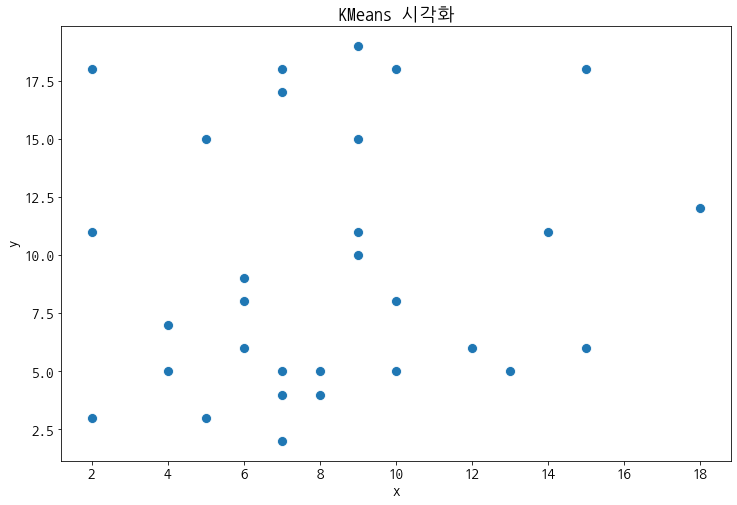

In [5]:
plt.figure(figsize = [12, 8])
sns.scatterplot(data = df, x = 'x', y = 'y', s = 100)
plt.title("KMeans 시각화")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

    KMeans를 수행하기 위해서는 Clustering을 수행할 데이터의 주제를 결정하고 얼마나 많은 Cluster를 만들지 결정한 후 데이터를 준비한다. 이 때, 데이터가 정확할 수록 유리하게 Clustering을 수행하기 위한 방법은 무작위 중심 (Centroid) 값 선택, K-Means++법 등 다양한다.

무작위 중심 (Centroid) 값 선택 알고리즘을 이용한 Clustering   
중심에 가까운 데이터를 Cluster에 포함시키고 중심을 Cluster의 중앙으로 이동시키는 과정을 반복해서 수행하면 되는데 더 이상 중심의 위치가 변하지 않을 때 까지 반복하는 것이 일반적이며 이러한 과정을 거치면 결과적으로 완전하게 군질화된 Cluster를 얻을 수 있다.

In [6]:
from IPython.display import Image

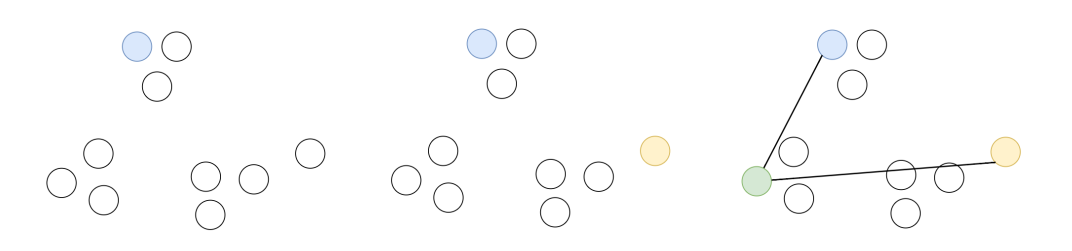

In [7]:
Image('./Image/Clustering1.png', width = 1400)

# 클러스터링을 위한 무작위 중심을 결정하는 방법은 가장 먼저 특정 노드(데이터)를 선택해서 클러스트의 중심으로 설정 (파란색)한다.
# 그 후에 선택된 노드에서 가장 먼 노드(노랑색)를 2번째 클러스터의 중심으로 설정한다.
# 그 다음부터는 이미 선택된 중심점들로 부터 가장 멀리있는 노드(녹색)가 중심이된다. 


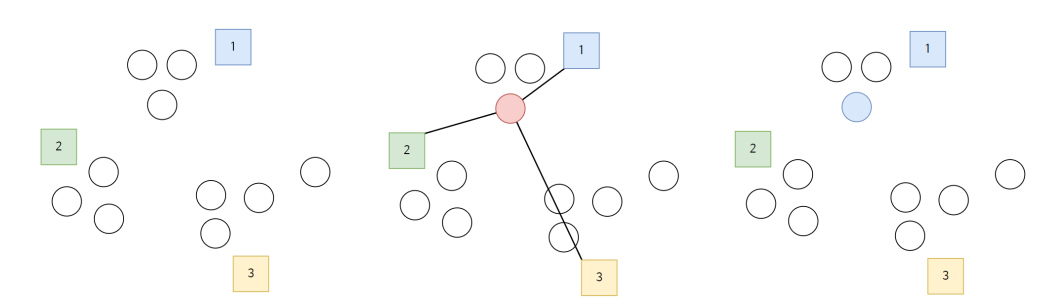

In [8]:
Image('./Image/Clustering2.png', width = 1400)
# 1, 2, 3, 세 개의 클러스터가 존재한다고 무작위 설정을 하고 하나 하나의 데이터를 선택해서 세 개의 클러스터 중에서 가장 가까운 
# 클러스터에 속하도록 한다.

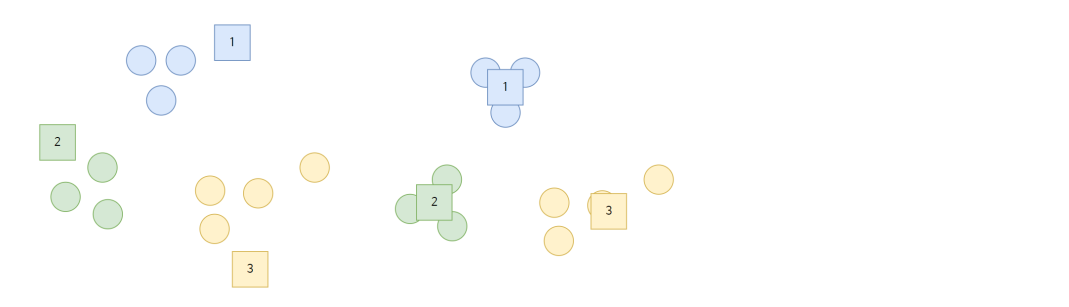

In [9]:
Image('./Image/Clustering3.png', width = 1400)
# 지정된 무작위 종심들을 이용해 주변 노드들을 cluster한다. 파란색이 1번 클러스터고. 녹색이 2번 클러스터고, 노란색이 3번 클러스터이다.
# 위의 과정을 전체 데이터에 대해 수행하면 아래의 그림과 같다.
# 대략적으로 군집화가 완료되면 완벽한 클러스터링을 위해 중심의 위치를 데이터 가운대로 이동시킨다. 각 클러스터의 4각형들의 움지김을 보면 볼 수 있다.
# 종심의 위치를 이동시키고 다시 모든 데이터에 대해 어떤 클러스터의 종심에 가까운지 하나씩 체크한다.
# 만약 특정한 데이터가 다른 클러스터의 중심에 더 가깝다면 그 클러스터에 속하도록 변경하면 된다.
# 클러스터의 중심 위치가 더 이상 바뀌지 않으면 클러스터링이 끝난다.

KMeans 알고리즘을 이용해서 Cluster 4개를 생성한다.

In [10]:
# sklearn 라이브러리의 KMeans() 함수를 이용해 데이터프레임의 데이터를 학습시킨다.
# KMeans() 함수의 n_clusters 속성으로 군집화 할 클러스터의 개수를 지정하고 fit() 함수에 학습할 데이터를 인수로 넘겨서 학습시킨다.
kmeans = KMeans(n_clusters= 4).fit(points)
# cluster_centers_: KMeans() 함수로 계산된 클러스터의 중심 위치를 얻어온다.
print(kmeans.cluster_centers_)
# labels_: KMeans() 함수로 계산된 클러스터를 얻어온다.
print(kmeans.labels_)

[[ 5.53846154  5.53846154]
 [15.66666667 13.66666667]
 [11.14285714  7.28571429]
 [ 7.         17.14285714]]
[0 0 3 0 0 0 3 0 0 0 0 0 0 3 3 0 0 2 2 3 3 2 2 3 2 2 1 2 1 1]


df 데이터프레임에 cluster라는 이름의 열을 만들고 군집화된 결과를 추가한다.

In [11]:
df['cluster'] = kmeans.labels_

In [12]:
df

,x,y,cluster
0,2,3,0
1,2,11,0
2,2,18,3
3,4,5,0
4,4,7,0
5,5,3,0
6,5,15,3
7,6,6,0
8,6,8,0
9,6,9,0


In [13]:
# 완성된 결과를 저장하려면 to_csv() 함수를 사용해 데이터프레임을 csv 파일로 저장한다.
df.to_csv('./Data/save.csv')

클러스터링 된 결과를 시각화 한다.

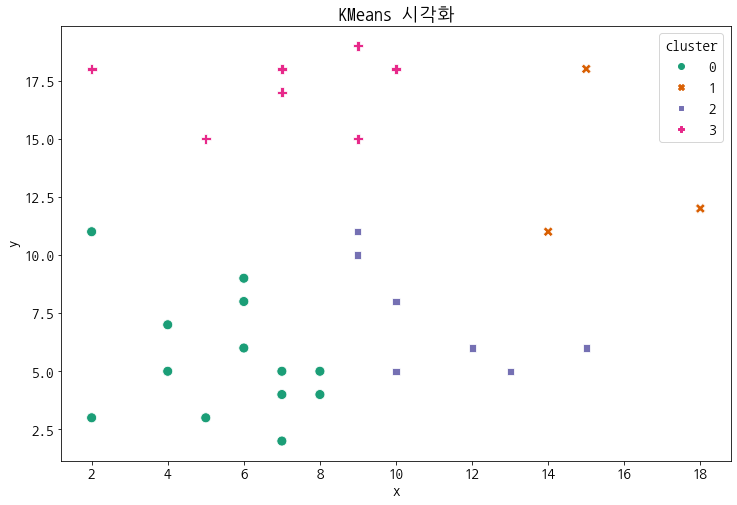

In [15]:
plt.figure(figsize=[12,8])
sns.scatterplot(data = df, x = 'x', y = 'y', s = 100, hue = 'cluster', style='cluster', palette="Dark2")
plt.title('KMeans 시각화')
plt.xlabel("x")
plt.ylabel('y')
plt.show()